In [1]:
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('regression.csv')

In [3]:
#independent variable = total foreign tourism arrivals by flight 2017-2021(September)
#dependent variable = Sun and beach tourism arriving by flight and staying in the principal Caribbean cities of Colombia 
df

,independent,dependent
0,134151,43375
1,150633,54363
2,143093,48589
3,142095,43463
4,124155,36656
5,138168,35943
6,168829,46447
7,161281,44509
8,135692,37293
9,131919,37897


In [4]:
df.describe()

,independent,dependent
count,57.000000,57.000000
mean,121944.771930,36975.228070
std,63782.013924,21281.082126
min,1.000000,0.000000
25%,74816.000000,14762.000000
50%,142507.000000,43104.000000
75%,168282.000000,52267.000000
max,217358.000000,76463.000000


Text(0, 0.5, 'Sun & Beach tourist')

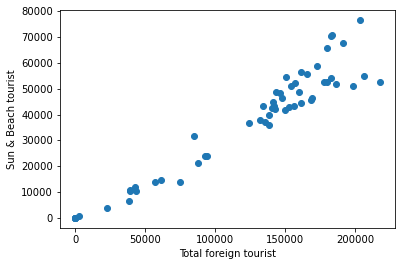

In [6]:
plt.scatter(df["independent"],df["dependent"])
plt.xlabel('Total foreign tourist')
plt.ylabel('Sun & Beach tourist')

In [7]:
# Train and Test data for the linear regression model 
X = df[['independent']]
y = df['dependent']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
len(X_train)

38

In [10]:
len(X_test)

19

In [11]:
X_train # random train data

,independent
22,168282
17,156218
6,168829
28,146307
38,84808
8,135692
34,159824
54,87313
29,152845
27,156779


In [12]:
lr = LinearRegression()

In [13]:
# calibration
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
lr.predict(X_test)

array([56340.28090353, 27118.40243199, 45195.90350066, 54335.85615452,
       48412.57394609, -1709.25486007, 53497.59121366, -1705.20677529,
       42025.3189435 , 42537.24597276, 57928.0643112 , 42665.53912122,
       15987.41484801, 17290.89814759, -1708.32068666, 55080.39236314,
       61538.02176269, 41314.41297768, -1706.45233984])

In [15]:
y_test

30    51667
56    23952
1     54363
13    65552
24    56274
39        0
18    52491
43        0
32    42686
3     43463
14    67537
20    42106
50    13742
53    14762
42        0
31    54055
37    76463
5     35943
41        0
Name: dependent, dtype: int64

In [16]:
lr.score(X_test, y_test) # accurate model

0.941391525487341

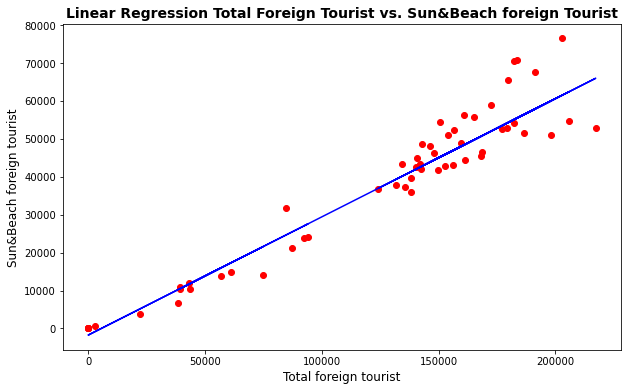

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, color = 'red')
plt.plot(X, lr.predict(X), color = 'blue')
plt.title('Linear Regression Total Foreign Tourist vs. Sun&Beach foreign Tourist', fontdict={'fontweight':'bold', 'fontsize': 14} )
plt.xlabel('Total foreign tourist', {'fontsize': 12})
plt.ylabel('Sun&Beach foreign tourist', {'fontsize': 12})
plt.savefig('LRtourism.png', dpi=80)
plt.show()

some predictions of the number of Sun&Beach tourism from a number of total visitors in a month

In [20]:
lr.predict( [ [248094] ] )

array([75544.39510593])

In [21]:
lr.predict( [ [239000] ] )

array([72712.60410586])

In [22]:
lr.predict( [ [67389] ] )

array([19274.45969041])

In [23]:
lr.predict( [ [159763] ] )

array([48038.90458166])

# The model is very accurate. For example if in a month 67389 tourist arrives to Colombia 19274 of those are going to the Beach Caribbean cities. If the number rise to 159763 the sun&beach visitors goes to 48038.